# ISSS609 Text Analytics and Applications
## IMBD Movie Review - Sentiment Analysis
### G1 - Group 4

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Text cleaning
import re, string
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', None)

# Modelling
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
import pickle
from text_analytics.config import RAW_DATA_PATH
from text_analytics.config import SENTIMENT_CLEANED_DATA_PATH

In [27]:
df_raw  = pd.read_csv(RAW_DATA_PATH)
df_raw.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [28]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## 1. VADER

In [30]:
df_raw.review = df_raw.review.replace(r"<.*?>"," ", regex=True)
df_raw.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive


In [31]:
SIA = SentimentIntensityAnalyzer()

def mapper(data):
    if data > 0:
        return "positive"
    else:
        return "negative"

def sentiment_analysis(df, colm_name):
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))
    # picking only compound score(combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
    # mapping the compound score to positive, negative
    df['vader_sentiment'] = df['compound_score'].apply(mapper)
    
    return df

In [34]:
df_vader = sentiment_analysis(df_raw, 'review')
df_vader.head()

,review,sentiment,polarity_scores,compound_score,vader_sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,"{'neg': 0.206, 'neu': 0.745, 'pos': 0.049, 'compound': -0.9951}",-0.9951,negative
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,"{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'compound': 0.9641}",0.9641,positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love. This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman. This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive,"{'neg': 0.093, 'neu': 0.689, 'pos': 0.218, 'compound': 0.978}",0.9780,positive
3,"Basically there's a family where a little bo

In [35]:
print(confusion_matrix(df_vader['sentiment'],df_vader['vader_sentiment']))
print(classification_report(df_vader['sentiment'],df_vader['vader_sentiment']))

[[13451 11549]
 [ 3565 21435]]
              precision    recall  f1-score   support

    negative       0.79      0.54      0.64     25000
    positive       0.65      0.86      0.74     25000

    accuracy                           0.70     50000
   macro avg       0.72      0.70      0.69     50000
weighted avg       0.72      0.70      0.69     50000



## 2. Classification with Count Vectorizer

In [36]:
df = pd.read_csv(SENTIMENT_CLEANED_DATA_PATH)
df.head()

,Unnamed: 0,preprocessed_review,length,class
0,0,"['one', 'reviewer', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'me', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'more', 'so', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romance', 'oz', 'mess', 'around', 'first', 'episode', 'ever', 'saw', 'struck', 'nasty', 'surreal', 'say', 'ready', 'it', 'watched', 'more', 'developed', 'taste', 'oz', 'got', 'accustomed', 'high', 'level', 'graphic', 'violence', 'violence', 'injustice', 'crooked', 'guard', 'who', 'sold', 'nickel', 'inmate', 'who', 'kill', 'order', 'get', 'away', 'it', 'well', 'mannered', 'middle', 'class', 'inmate', 'turned', 'prison', 'bitch', 'due', 'lack', 'street', 'skill', 'prison', 'experience', 'watching', 'oz', 'may', 'become', 'comfortable', 'uncomfortable', 'viewing', 'thats', 'get', 'touch', 'darker', 'side']",168,1
1,1,"['wonderful', 'little', 'production', 'ing', 'technique', 'fashion', 'give', 'comforting', 'sometimes', 'discomforting', 'sense', 'realism', 'entire', 'piece', 'actor', 'extremely', 'well', 'michael', 'sheen', 'ha', 'got', 'polari', 'voice', 'pat', 'too', 'truly', 'see', 'seamless', 'editing', 'guided', 'reference', 'williams', 'diary', 'entry', 'well', 'worth', 'watching', 'terrificly', 'written', 'performed', 'piece', 'masterful', 'production', 'one', 'great', 'master', 'comedy', 'life', 'realism', 'really', 'come', 'home', 'little', 'thing', 'fantasy', 'guard', 'which', 'rather', 'use', 'traditional', 'technique', 'remains', 'solid', 'disappears', 'play', 'knowledge', 'sens', 'particularly', 'scene', 'concerning', 'orton', 'halliwell', 'set', 'particularly', 'flat', 'halliwell', 'mural', 'decorating', 'every', 'surface', 'terribly', 'well', 'done']",83,1
2,2,"['thought', 'wonderful', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'watching', 'comedy', 'plot', 'simplistic', 'dialogue', 'witty', 'character', 'likable', 'even', 'well', 'bread', 'suspected', 'serial', 'killer', 'may', 'disappointed', 'realize', 'match', 'point', 'risk', 'addiction', 'thought', 'proof', 'woody', 'allen', 'still', 'fully', 'control', 'style', 'many', 'u', 'grown', 'i', 'laughed', 'one', 'woody', 'comedy', 'year', 'dare', 'say', 'decade', 'i', 'never', 'impressed', 'scarlet', 'johanson', 'managed', 'tone', 'sexy', 'image', 'jumped', 'right', 'average', 'spirited', 'young', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wear', 'prada', 'interesting', 'superman', 'great', 'comedy', 'go', 'see', 'friend']",82,1
3,3,"['basically', 'there', 'family', 'little', 'boy', 'jake', 'think', 'there', 'zombie', 'closet', 'parent', 'fighting', 'slower', 'soap', 'opera', 'suddenly', 'jake', 'decides', 'become', 'rambo', 'kill', 'first', 'going', 'make', 'must', 'decide', 'thriller', 'drama', 'drama', 'watchable', 'parent', 'divorcing', 'arguing', 'like', 'real', 'life', 'jake', 'closet', 'totally', 'ruin', 'expected', 'see', 'boogeyman', 'similar', 'instead', 'watched', 'drama', 'meaningless', 'thriller', 'spot', 'well', 'playing', 'parent', 'descent', 'dialog', 'shot', 'jake', 'ignore', 'them']",59,0
4,4,"['petter', 'mattei', 'love', 'time', 'money', 'visually', 'stunning', 'watc

In [37]:
x = df['preprocessed_review']
y = df['class']
sum(y==1)/len(y)  #class balanced

0.5018756806905732

In [38]:
x_train_orig, x_test_orig, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state = 2022)

## Prepare functions

In [24]:
def tabulate_perf(model_list,x_train,y_train,x_test,y_test):
    name_list=[]
    train_accuracy, test_accuracy = [], []
    train_precision, test_precision = [], []
    train_recall, test_recall = [], []
    train_f1, test_f1 = [], []
    train_auc, test_auc = [], []

    for name, model in model_list.items():
        # get predictions
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        y_train_prob = model.predict_proba(x_train)[:,1]  
        y_test_prob = model.predict_proba(x_test)[:,1]  
        # records the results
        name_list.append(name)
        train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
        test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
        train_precision.append(metrics.precision_score(y_train, y_train_pred))
        test_precision.append(metrics.precision_score(y_test, y_test_pred))
        train_recall.append(metrics.recall_score(y_train, y_train_pred))
        test_recall.append(metrics.recall_score(y_test, y_test_pred))
        train_f1.append(metrics.f1_score(y_train, y_train_pred))
        test_f1.append(metrics.f1_score(y_test, y_test_pred))
        train_auc.append(metrics.roc_auc_score(y_train, y_train_prob))
        test_auc.append(metrics.roc_auc_score(y_test, y_test_prob))
    # compile into a single dataframe
    model_perform =pd.DataFrame({'model': name_list,
                                 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy, 
                                 'train_precision':train_precision, 'test_precision':test_precision, 
                                 'train_recall':train_recall, 'test_recall':test_recall,
                                 'train_f1':train_f1, 'test_f1':test_f1,
                                 'train_auc':train_auc, 'test_auc':test_auc})
    return model_perform

In [ ]:
def plot_roc(model_list,x_test,y_test):
    # set the plot size
    plt.figure(figsize=(8, 6))

    for name, model in model_list.items():
        y_test_prob = model.predict_proba(x_test)[:,1]     # get the predicted probability
        auc = round(metrics.roc_auc_score(y_test, y_test_prob), 4) # calculate AUC
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob) # calculate fpr and tpr for ROC curve
        plt.plot(fpr,tpr,label="ROC for "+str(name)+" AUC="+str(auc))

    # plot random classifier line
    plt.plot([0, 1], [0, 1], ls = '--',color='k' )             
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Testing ROC Curve for all models')

## 2. CountVectorizer

In [39]:
#CountVectorizer converts a collection of text documents to a matrix of token counts
cv = CountVectorizer(ngram_range=(1,2), min_df =10)
x_train = cv.fit_transform(x_train_orig)
x_test = cv.transform(x_test_orig)

In [40]:
# -------------- 2 baseline models -----------------
logit_cv = LogisticRegression(random_state=2022, max_iter=1000)
logit_cv.fit(x_train,y_train)
y_test_pred = logit_cv.predict(x_test)
print('---Logistic Regression---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

rf_cv = RandomForestClassifier(random_state=2022)
rf_cv.fit(x_train,y_train)
y_test_pred = rf_cv.predict(x_test)
print('---Random Forest---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))
# -------- other models for reference only ----------
nb_cv = MultinomialNB()
nb_cv.fit(x_train,y_train)
y_test_pred = nb_cv.predict(x_test)
print('---Naive Bayes---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

xgb_cv = XGBClassifier(random_state=2022)
xgb_cv.fit(x_train,y_train)
y_test_pred = xgb_cv.predict(x_test)
print('---XGBoost---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

---Logistic Regression---
[[4356  584]
 [ 470 4507]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4940
           1       0.89      0.91      0.90      4977

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

---Random Forest---
[[4212  728]
 [ 709 4268]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4940
           1       0.85      0.86      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

---Naive Bayes---
[[4304  636]
 [ 605 4372]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4940
           1       0.87      0.88      0.88      4977

    accuracy                         

### 2.1. Logistic & RF Hyperparameter Tuning

In [45]:
logit_cv_tune = LogisticRegression(random_state=2022, max_iter=2000) #increase max_iter to converge
param_logit = {"penalty": ["l1", "l2"],
              'C': [0.01, 0.1, 1, 10],
               'solver': ['liblinear']
              }

logit_cv_gs = GridSearchCV(logit_cv_tune, param_logit, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
logit_cv_gs.fit(x_train, y_train)
logit_cv_bst = logit_cv_gs.best_estimator_
print('best score:', logit_cv_gs.best_score_)  # score of best_estimator on the left out data 
print('best parameters: ', logit_cv_gs.best_params_)

best score: 0.8941210405150294
best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [47]:
rf_cv_tune = RandomForestClassifier(random_state=2022)
param_rf = {"criterion": ["gini", "entropy"],
              'n_estimators': list(range(100, 500, 100)),
              'max_features': ['log2', 'sqrt'],
              'bootstrap': [True, False]}

rf_cv_gs = RandomizedSearchCV(rf_cv_tune, param_rf, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
rf_cv_gs.fit(x_train, y_train)
rf_cv_bst = rf_cv_gs.best_estimator_
print('best score:', rf_cv_gs.best_score_)
print('best parameters: ', rf_cv_gs.best_params_)

best score: 0.8814156166586944
best parameters:  {'n_estimators': 400, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': False}


In [48]:
model_list = {'Logistic':logit_cv, 'Random Forest':rf_cv, 'Logistic Tuned':logit_cv_bst, 'RF Tuned':rf_cv_bst, 'Naive Bayes':nb_cv, 'XGBoost':xgb_cv}
tabulate_perf(model_list,x_train,y_train,x_test,y_test)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
0,Logistic,0.999849,0.893718,0.999699,0.885288,1.000000,0.905566,0.999849,0.895312,1.000000,0.956718
1,Random Forest,1.000000,0.855097,1.000000,0.854283,1.000000,0.857545,1.000000,0.855911,1.000000,0.931296
2,Logistic Tuned,0.982226,0.898558,0.979714,0.887566,0.984980,0.913603,0.982340,0.900396,0.998217,0.959951
3,RF Tuned,1.000000,0.884138,1.000000,0.868502,1.000000,0.906369,1.000000,0.887032,1.000000,0.951257
4,Naive Bayes,0.907778,0.874861,0.907100,0.873003,0.909379,0.878441,0.908238,0.875714,0.963331,0.937229
5,XGBoost,0.918618,0.862257,0.904850,0.846878,0.936304,0.885674,0.920308,0.865842,0.976627,0.936803


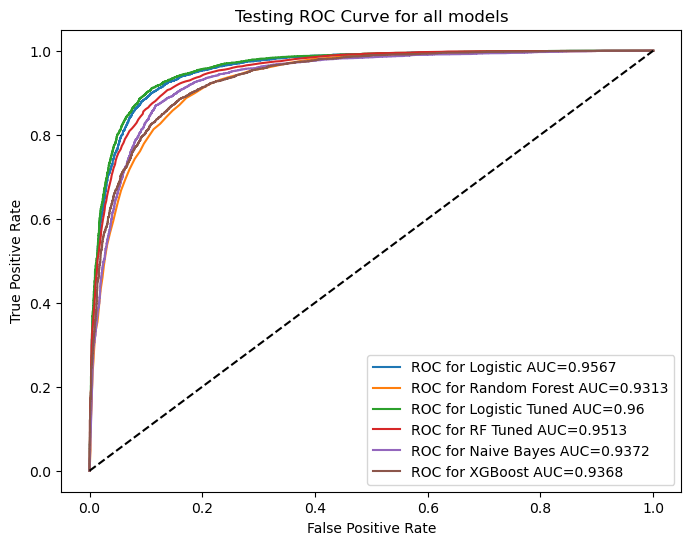

In [49]:
plot_roc(model_list,x_test,y_test)

## 3. TF-IDF Vectorizer

In [50]:
# TfidfVectorizer is equivalent to CountVectorizer followed by TfidfTransformer.
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df =10)
x_train = tfidf.fit_transform(x_train_orig)
x_test = tfidf.transform(x_test_orig)

In [51]:
# -------------- 2 baseline models -----------------
logit_tfidf = LogisticRegression(random_state=2022, max_iter=1000)
logit_tfidf.fit(x_train,y_train)
y_test_pred = logit_tfidf.predict(x_test)
print('---Logistic Regression---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

rf_tfidf = RandomForestClassifier(random_state=2022)
rf_tfidf.fit(x_train,y_train)
y_test_pred = rf_tfidf.predict(x_test)
print('---Random Forest---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

# -------- other models for reference only ----------
nb_tfidf = MultinomialNB()
nb_tfidf.fit(x_train,y_train)
y_test_pred = nb_tfidf.predict(x_test)
print('---Naive Bayes---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

xgb_tfidf = XGBClassifier(random_state=2022)
xgb_tfidf.fit(x_train,y_train)
y_test_pred = xgb_tfidf.predict(x_test)
print('---XGBoost---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

---Logistic Regression---
[[4325  615]
 [ 425 4552]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4940
           1       0.88      0.91      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917

---Random Forest---
[[4233  707]
 [ 678 4299]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4940
           1       0.86      0.86      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

---Naive Bayes---
[[4274  666]
 [ 522 4455]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4940
           1       0.87      0.90      0.88      4977

    accuracy                         

In [52]:
logit_tfidf_tune = LogisticRegression(random_state=2022, max_iter=2000) #increase max_iter to converge

logit_tfidf_gs = GridSearchCV(logit_tfidf_tune, param_logit, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
logit_tfidf_gs.fit(x_train, y_train)
logit_tfidf_bst = logit_tfidf_gs.best_estimator_
print('best score:', logit_tfidf_gs.best_score_)  # score of best_estimator on the left out data 
print('best parameters: ', logit_tfidf_gs.best_params_)

best score: 0.8991284117102406
best parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [53]:
rf_tfidf_tune = RandomForestClassifier(random_state=2022)

rf_tfidf_gs = RandomizedSearchCV(rf_tfidf_tune, param_rf, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
rf_tfidf_gs.fit(x_train, y_train)
rf_tfidf_bst = rf_tfidf_gs.best_estimator_
print('best score:', rf_tfidf_gs.best_score_)
print('best parameters: ', rf_tfidf_gs.best_params_)

best score: 0.8770130154182312
best parameters:  {'n_estimators': 400, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': False}


In [54]:
model_list = {'TFIDF Logistic':logit_tfidf, 'TFIDF Random Forest':rf_tfidf, 'TFIDF Logistic Tuned':logit_tfidf_bst, 'TFIDF RF Tuned':rf_tfidf_bst,
                'Naive Bayes':nb_tfidf, 'XGBoost':xgb_tfidf}
tabulate_perf(model_list,x_train,y_train,x_test,y_test)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
0,TFIDF Logistic,0.938031,0.895130,0.931372,0.880975,0.946250,0.914607,0.938752,0.897476,0.984647,0.962084
1,TFIDF Random Forest,1.000000,0.860341,1.000000,0.858769,1.000000,0.863773,1.000000,0.861264,1.000000,0.933120
2,TFIDF Logistic Tuned,0.992941,0.902592,0.991831,0.891470,0.994123,0.917621,0.992975,0.904356,0.999703,0.964883
3,TFIDF RF Tuned,1.000000,0.876777,1.000000,0.858233,1.000000,0.903757,1.000000,0.880407,1.000000,0.948723
4,Naive Bayes,0.915921,0.880206,0.908298,0.869947,0.925956,0.895118,0.917042,0.882353,0.973266,0.950196
5,XGBoost,0.925274,0.857618,0.909706,0.843118,0.944894,0.880048,0.926966,0.861188,0.981098,0.936616


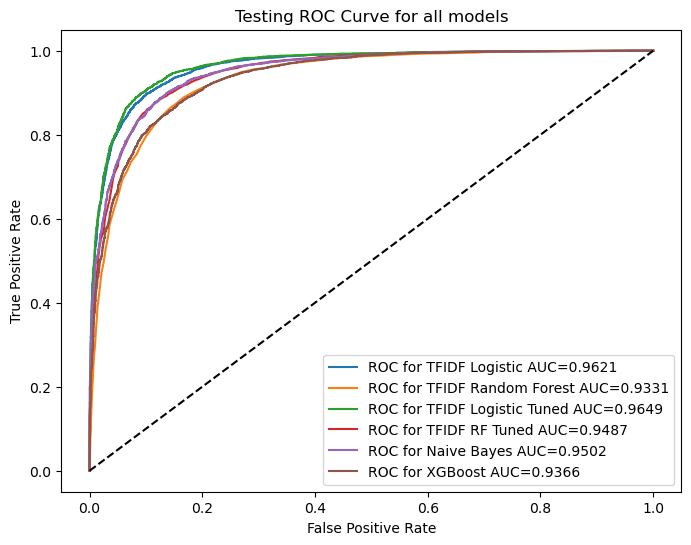

In [55]:
plot_roc(model_list,x_test,y_test)

## Feature importance for Logistic and RF

In [56]:
print(len(cv.vocabulary_))
print(len(tfidf.vocabulary_))

61317
61317


In [57]:
def get_top_n_gram(vec,data,n=None):
    sum_words = data.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
    
x_train_cv = cv.fit_transform(x_train_orig)
x_train_tfidf = tfidf.fit_transform(x_train_orig)

In [58]:
get_top_n_gram(cv,x_train_cv,10)

[('one', 42053),
 ('like', 31687),
 ('time', 23448),
 ('good', 22905),
 ('character', 21944),
 ('even', 19463),
 ('story', 19441),
 ('get', 19440),
 ('would', 19314),
 ('it', 19251)]

In [59]:
get_top_n_gram(tfidf,x_train_tfidf,10)

[('one', 859.8073063571685),
 ('like', 732.3095004690907),
 ('good', 634.2026561631193),
 ('time', 604.1237795001592),
 ('character', 589.9333674534897),
 ('story', 567.1285323844011),
 ('it', 558.2842469103059),
 ('really', 543.7959473483282),
 ('would', 538.4558315233985),
 ('see', 530.4790986535922)]

In [60]:
logit_cv_feature=pd.DataFrame({'coef':logit_cv_bst.coef_[0], 'feature':cv.get_feature_names_out()})
logit_cv_feature.sort_values('coef',key=abs, ascending=False)[:20]

,coef,feature
60193,-1.233359,worst
57818,-1.226724,waste
3920,-1.212129,awful
6268,-1.001285,boring
16541,0.995237,excellent
13085,-0.992913,disappointing
13088,-0.948596,disappointment
34452,-0.886152,mstk
17115,-0.864032,fails
24243,-0.862344,horrible


In [61]:
logit_tfidf_feature=pd.DataFrame({'coef':logit_tfidf_bst.coef_[0], 'feature':tfidf.get_feature_names_out()})
logit_tfidf_feature.sort_values('coef',key=abs, ascending=False)[:20]

,coef,feature
60193,-16.458796,worst
3920,-14.721659,awful
57818,-13.617318,waste
16541,13.092214,excellent
6268,-12.856955,boring
4144,-12.766488,bad
21959,12.301406,great
13085,-10.364842,disappointing
52325,-10.073920,terrible
24243,-10.065422,horrible


Text(0.5, 0, 'Random Forest Feature Importance')

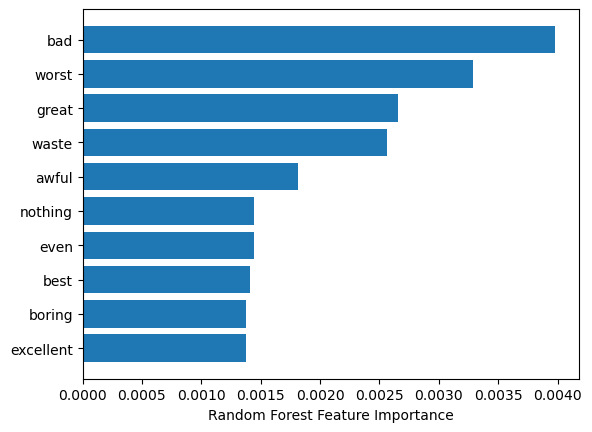

In [62]:
sorted_idx = rf_cv_bst.feature_importances_.argsort()[-10:]
plt.barh(cv.get_feature_names_out()[sorted_idx], rf_cv_bst.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

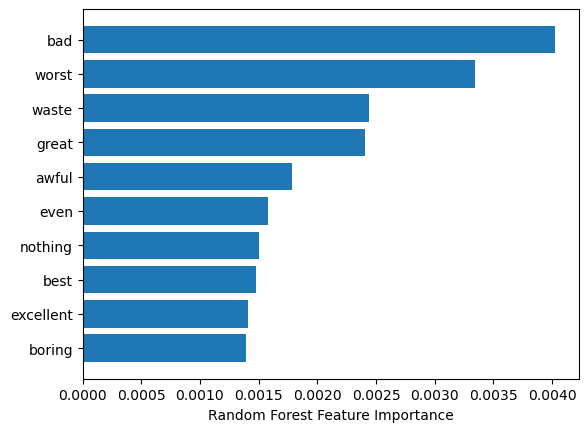

In [63]:
sorted_idx = rf_tfidf_bst.feature_importances_.argsort()[-10:]
plt.barh(tfidf.get_feature_names_out()[sorted_idx], rf_tfidf_bst.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [64]:
#dump trained vectorizers and models
pickle.dump(cv, open('cv.sav', 'wb'))
pickle.dump(tfidf, open('tfidf.sav', 'wb'))

pickle.dump(logit_cv_bst, open('logit_cv_bst.sav', 'wb'))
pickle.dump(logit_tfidf_bst, open('logit_tfidf_bst.sav', 'wb'))